#code to convert kml to geojson 
import kml2geojson
kml2geojson.main.convert('BBMPWardsMap.kml', 'bbmpwards')

#code to get locations
textloc = 'Kumara Park, Bengaluru'
loc = gc.osm(textloc)
loc.json

#PP
import pandas_profiling as pp
pp.ProfileReport(mdf)

In [95]:
import folium
from folium import plugins
import geocoder as gc
import pandas as pd
import geopandas as gpd
import json

In [127]:
df = pd.read_excel("ReliefRiders.xlsx", sheet_name="Sorties")
df.head()
#len(df["ward_number"].unique())

,date,time,rider_name,area_name,service_location,ward_number,store_location,store_type,total_km,strava_tracked,pictures,Unnamed: 11
0,2020-03-29,morning,Brigadier Ravi Muniswamy,Chamundi Layout,Thindlu,9,"2nd Main, Chamundi Layout",Provisions,6.0,No,NaN,NaN
1,2020-03-29,Evening,Brigadier Ravi Muniswamy,Chamundi Layout,Thindlu,9,"2nd Main, Chamundi Layout",Rice,6.0,No,NaN,NaN
2,2020-03-30,Evening,Poojya Basavaraj,Indiranagar,3rd main Defence colony,80,"SMK store, Hopcoms- Krishna Temple road",Provisions,2.0,No,NaN,NaN
3,2020-03-30,Evening,Poojya Basavaraj,Indiranagar,4th cross Defence colony,80,"Top in Town, 7th Main",Provisions,1.0,No,NaN,NaN
4,2020-03-31,Evening,Sathya Sankaran,Sanjaynagar,"3rd Cross, NGEF Layout",19,MSR Pharma (Ramaiah Hospital),Medical,4.0,No,Yes,NaN


In [128]:
wdf = pd.read_csv("wardslist.csv")
wdf.head()

,ward_number,ward_name,ass_const,ls_const
0,1,Kempegowda,Yelahanka,Chikballapur
1,2,Chowdeshwari,Yelahanka,Chikballapur
2,3,Attur,Yelahanka,Chikballapur
3,4,Yelahanka Satellite Town,Yelahanka,Chikballapur
4,5,Jakkur,Byatarayanapura,Bangalore North


In [110]:
#cleanup
df["ward_number"].astype(int)
df['pictures'] = df['pictures'].str.strip()
df.replace(to_replace=["Yes", "YES", "posted in the group", "yes- GoPro footage"], 
           value="yes", inplace=True)
df.replace(to_replace=["No", "NO"], 
           value="no", inplace=True)

df.replace(to_replace=["part"], value="yes", inplace=True)
df["total_km"].fillna(0, inplace=True)

In [111]:
df["pictures"].value_counts()

no     118
yes    113
Name: pictures, dtype: int64

In [130]:
mdf = pd.merge(df, wdf, how="left", on=["ward_number"])
mdf.head()

,date,time,rider_name,area_name,service_location,ward_number,store_location,store_type,total_km,strava_tracked,pictures,Unnamed: 11,ward_name,ass_const,ls_const
0,2020-03-29,morning,Brigadier Ravi Muniswamy,Chamundi Layout,Thindlu,9,"2nd Main, Chamundi Layout",Provisions,6.0,No,NaN,NaN,Vidyaranyapura,Byatarayanapura,Bangalore North
1,2020-03-29,Evening,Brigadier Ravi Muniswamy,Chamundi Layout,Thindlu,9,"2nd Main, Chamundi Layout",Rice,6.0,No,NaN,NaN,Vidyaranyapura,Byatarayanapura,Bangalore North
2,2020-03-30,Evening,Poojya Basavaraj,Indiranagar,3rd main Defence colony,80,"SMK store, Hopcoms- Krishna Temple road",Provisions,2.0,No,NaN,NaN,Hoysala Nagar,CV Raman Nagar,Bangalore Central
3,2020-03-30,Evening,Poojya Basavaraj,Indiranagar,4th cross Defence colony,80,"Top in Town, 7th Main",Provisions,1.0,No,NaN,NaN,Hoysala Nagar,CV Raman Nagar,Bangalore Central
4,2020-03-31,Evening,Sathya Sankaran,Sanjaynagar,"3rd Cross, NGEF Layout",19,MSR Pharma (Ramaiah Hospital),Medical,4.0,No,Yes,NaN,Sanjay Nagar,Hebbal,Bangalore North


In [131]:
mdf["total_km"].agg(["count", "sum"])

count     238.00
sum      1745.01
Name: total_km, dtype: float64

In [132]:
import calendar
mdf["month"] = mdf["date"].dt.month.apply(lambda x: calendar.month_abbr[x])
mdf["month"].value_counts()

Apr    203
May     22
Mar      7
Jun      6
Jul      1
Name: month, dtype: int64

In [133]:
#mdf["rider_name"].value_counts()
mdf.groupby(["rider_name"]).total_km.agg(["count", "sum"]).sort_values(by="count", ascending=False).head(10)

,count,sum
rider_name,,
Poojya Basavaraj,30,95.50
Avinash Loganathan,22,122.50
Kittu Pakala,12,52.40
Sathya Sankaran,12,40.47
Anur Huilgol,10,82.00
Manu Konchady,10,60.50
Sundeep Rau,10,37.00
Tasneem,8,63.00
Rupaparna Sarkar,8,27.00


In [134]:
mdf.pivot_table(index="rider_name", columns="month", values="total_km", aggfunc="sum", 
                fill_value=0, margins=True).sort_values(by="All", ascending=False).head(10)

month,Apr,Jul,Jun,Mar,May,All
rider_name,,,,,,
All,1463.16,6.6,109,27,139.25,1745.01
Avinash Loganathan,97.50,0.0,0,5,20.00,122.50
Pramod,101.50,0.0,0,0,20.69,122.19
Poojya Basavaraj,69.50,0.0,5,3,18.00,95.50
Anur Huilgol,82.00,0.0,0,0,0.00,82.00
Pramod Jayaprakash,0.00,0.0,70,0,0.00,70.00
Tasneem,63.00,0.0,0,0,0.00,63.00
Sandeep Tomar,61.15,0.0,0,0,0.00,61.15
Manu Konchady,49.50,0.0,0,0,11.00,60.50


In [135]:
#mdf["date"].value_counts().head(10)
mdf.groupby(["date"]).total_km.agg(["count", "sum"]).sort_values(by="count", ascending=False).head(10)

,count,sum
date,,
2020-04-16,14,128.10
2020-04-15,13,118.62
2020-04-11,12,143.22
2020-04-18,11,87.41
2020-04-17,11,106.60
2020-04-29,10,93.14
2020-04-25,10,100.41
2020-04-21,10,61.14
2020-04-12,10,84.40


In [136]:
#mdf["ward_name"].value_counts().head(10)
rides_byward = mdf.groupby(["ward_number"]).total_km.agg(["count", "sum"])
rides_byward["ward_desc"] = mdf["ward_number"].astype(str) + ", " + mdf["ward_name"].astype(str)
rides_byward.reset_index(inplace=True)
rides_byward #.sort_values(by="count", ascending=False)

,ward_number,count,sum,ward_desc
0,0,2,52.20,"9, Vidyaranyapura"
1,1,2,23.00,"9, Vidyaranyapura"
2,2,1,5.00,"80, Hoysala Nagar"
3,6,5,75.78,"65, Kadumalleshwara"
4,9,5,52.50,"65, Kadumalleshwara"
5,11,1,12.00,"35, Aramane Nagar"
6,17,4,55.00,"19, Sanjay Nagar"
7,18,14,47.97,"57, C.V.Raman Nagar"
8,19,12,47.00,"18, Radhakrishna Temple"
9,21,1,6.00,"93, Vasanth Nagar"


In [137]:
bbmpwards=f"bengaluru-wards-joined.json"

<AxesSubplot:>

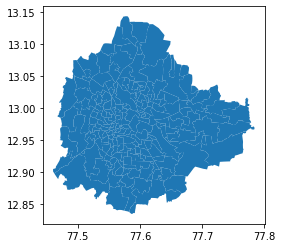

In [34]:
#Trying to use geopandas to map ward json
map_gpblr=gpd.read_file(bbmpwards)
map_gpblr.plot()

In [160]:
map_blr = folium.Map(location=[12.9791198, 77.5912997], tiles="Stamen Toner", zoom_start=11)
map_blr

In [161]:
folium.GeoJson(
    bbmpwards,
    name='geojson'
).add_to(map_blr)
map_blr

In [153]:
map_blr = folium.Map(location=[12.9791198, 77.5912997], tiles="Stamen Toner", zoom_start=11)
cpleth_blr = folium.Choropleth(
    geo_data=bbmpwards,
    name='choropleth',
    data=rides_byward,
    columns=['ward_number', 'count'],
    key_on='feature.properties.Ward_Number',
    fill_color='OrRd',
    nan_fill_color='white',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Sorties', 
    highlight=True
).add_to(map_blr)

folium.LayerControl().add_to(map_blr)
cpleth_blr.geojson.add_child(
    folium.features.GeoJsonTooltip(['Ward_Name'], labels=False)
)

map_blr
#map_blr.save("blr.html")